# Finite Element Methods: HW 3

**Answer 1** From definitions we know that $-\Delta u = - \nabla^2 u = -(\frac{\partial^2}{\partial x_1^2} + \frac{\partial^2}{\partial x_2^2}) = -\frac{\partial^2}{\partial x_1^2} - \frac{\partial^2}{\partial x_2^2} $, and so we get:

$\begin{align*}
u &= x_1x_2-x_1x_2^2-x_1^2x_2+x_1^2x_2^2 \\
\frac{\partial u}{\partial x_1} &= x_2-x_2^2-2x_1x_2+2x_1x_2^2 \\
\frac{\partial^2 u}{\partial x_1^2} &= -2x_2+2x_2^2
\end{align*}$

And by symmetry 
$\begin{align*}
\frac{\partial^2}{\partial x_2^2} = -2x_1+2x_1^2
\end{align*}$

Thus 
$\begin{align*}-\Delta u =f= -(-2x_2+2x_2^2)-(-2x_1+2x_1^2) 
\end{align*}$




Again starting from definitions, we see that $\nabla u$ is:
\begin{align*}
x_2-x_2^2-2x_1x_2+2x_1x_2^2+x_1-x_1^2-2x_1x_2+2x_2x_1^2
\end{align*}

Similarly following from definitions we have that $D^2f$ is:


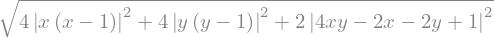

In [4]:
from sympy import *
import math

init_printing(use_unicode=False, wrap_line=False)
x = Symbol('x')
y = Symbol('y')

u = x*y - x*y**2-x**2*y+x**2*y**2

D_squared_f = sqrt(abs(diff(u,x,2))**2+2*abs(diff(u,x,y))**2+abs(diff(u,y,y))**2)
D_squared_f




For this we use SymPy, but we simplify a bit further:
$\begin{align*}
||u||_{L^2(\Omega)} &= \bigg(\int_\Omega u^2 d\Omega \bigg)^{\frac{1}{2}} \\
&= \bigg(\int^1_0 \int^1_2 u^2 dx_1dx_2 \bigg)^{\frac{1}{2}} \\
&= \bigg(\int^1_0 \int^1_2 (x_1-x_1^2)^2(x_2-x_2^2)^2 dx_1dx_2 \bigg)^{\frac{1}{2}}
\end{align*} $

In [5]:
sqrt(integrate(abs(u)**2,(x,0,1),(y,0,1)))


Finally for $||\nabla u||_{L^2(\Omega)}$ we have:



In [6]:
nabla_u = diff(u,x) + diff(u,y)
nabla_u
sqrt(integrate(abs(nabla_u)**2,(x,0,1),(y,0,1)))

**Answer 2**

We will use techniques from Lecture-4. We realize that in our case $|\overline{K}| = \frac{1}{2}$, and using the identity $\int_K\phi_1^m\phi_2^n\phi_3^p = \frac{2m!n!p!}{(m+n+p+2)!}|\overline{K}|$
Since our domain is only a triangle we expect a $3 \times 3$ matrix, which then gives us:
$\begin{pmatrix} \phi_1\phi_1 & \phi_1\phi_2 & \phi_1\phi_3 \\
\phi_2\phi_1 & \phi_2\phi_2 & \phi_2\phi_3 \\
\phi_3\phi_1 & \phi_3\phi_2 & \phi_3\phi_3 \\
\end{pmatrix}$

$\begin{align*}
M^{\overline{K}} = \frac{1}{12} \begin{pmatrix} 2 & 1 & 1\\
1 & 2 & 1 \\
1 & 1 & 2
\end{pmatrix}\frac{1}{2}
\end{align*}$

First we notice that our triangle has nodes $N_1=(0,0),N_2=(1,0),N_3=(0,1)$, however $a=1$. We have already observed that $|\overline{K}|=\frac{1}{2}$. Thus by plugging in we see that $b_1 = -1, c_1 = -1,b_2 = 1,c_2 = 0, b_3 = 0, c_3 = 1$. This means that the stiffnmess matrix is:

$A^{\overline{K}}=\begin{pmatrix}
1 & -1 & -1 \\
-1 & 1 & 0 \\
-1 & 0 & 1
\end{pmatrix} \times \frac{1}{2}$


**Answer 3**

We use the pderect tool in matlab to give us (with code given at the end of the document), a square with a square cutout. We use Mesh > Initialize Mesh to create a mesh and use Mest > Export mesh to give us the $(p,e,t)$ matrix, all of which are included at the end of the document.



**Answer 4** 

Observe that in our particular case we have that $a=n=1$ and $f=0$, and so our first equation is the one below:

$\begin{align*}
-\nabla \cdot (\nabla u) &= 0 & \in \text{int}(\Omega)\\
\end{align*}$


For the boundary equation we need to do some simplification

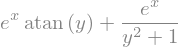

In [7]:
from sympy import *


x, y = symbols('x y')
init_printing(use_unicode=True)

u = exp(x) * atan(y)
del_u = diff(u,x) + diff(u,y)
del_u

this means that on the boundary we have (for simplification let $x_1=x,x_2=y$):
$\begin{align*}
-n \cdot (a \nabla u) &= \kappa (u-g_D) - g_N &&\in \partial \Omega \\
-ne^x\arctan(y) - \frac{ne^x}{y^2+1} &= \kappa e^{x}\arctan(y) - \kappa g_D - g_N
\end{align*}$

Comparing coefficients then yields that: $\kappa = 1$, $n=-1$, $g_N = 0$ and $g_D = \frac{-e^x}{y^2+1}$. Please see the end of the document for the matlab implementation. We then modify the code from Larson to indicate that $\kappa$ is a constant 1 and $a$ is a constant 1. Our $p,e,t,\xi$ matrices are at the end of the document.

**Answer 5**

We will adapt Step-3 for our purpose. We replace $\texttt{GridGenerator::hyper\_cube(triangulation, -1,1)}$ on line 98 (stripped comments) with $\texttt{GridGenerator::hyper\_rectangle(triangulation,\{-2,-6.28\},\{2,6.28\})};$

We then replace Line 180 with $\texttt{Functions::SymbolicFunction<2> fun("exp(x)*atan(y)")}$ however this will require the following headers: #include <deal.II/base/function_lib.h>}$ #include <deal.II/base/symbolic_function.h> #include <deal.II/base/function_spherical.h>

Unfortunately I could not get symbolic functions to work, but I did get cosine boundaries to work and exponential boundaries to work.

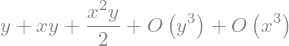

In [8]:
expand(series(exp(x),x,n=3) * series(atan(y),y,n=3))